In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# List files in root directory.


from subprocess import check_output
print(check_output(["ls", "."]).decode("utf8"))

DataView.ipynb
gemma artifact_conc_11_031116_133345.csv
gemma artifact_raw_11_031116_133345.csv



Import the concentration data to get an idea where artifacts occur:

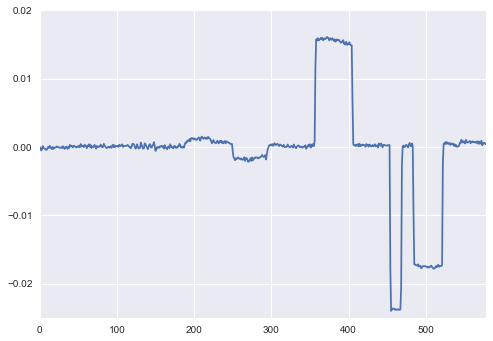

In [2]:
df_conc = pd.read_csv('./gemma artifact_conc_11_031116_133345.csv', header=None)
df_conc.iloc[:,0].plot()

In [3]:
df = pd.read_csv('./gemma artifact_raw_11_031116_133345.csv', header=None)

Data is collected at around 5Hz so there will be five times as may data points as seconds of data collected.

Begin by plotting the time series for the first wavelength in order to get a feel for timings. At least one or two of the light based artifacts shuld be readily visible via this.

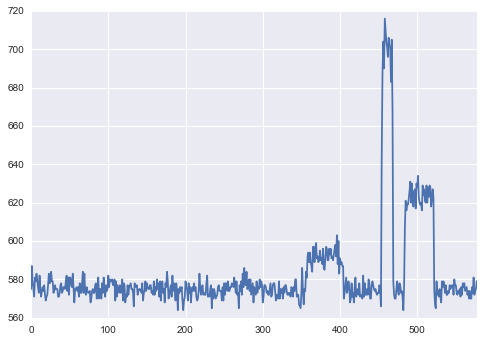

In [4]:
df.iloc[:,0].plot()

Plot the first spectrum in order to consider a "normal" signal.

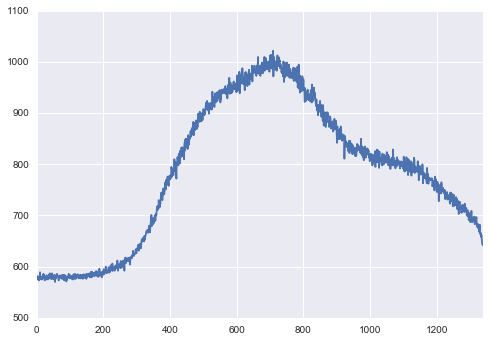

In [5]:
df.iloc[0,:].plot()

Around 370 will be the ambient artifacts

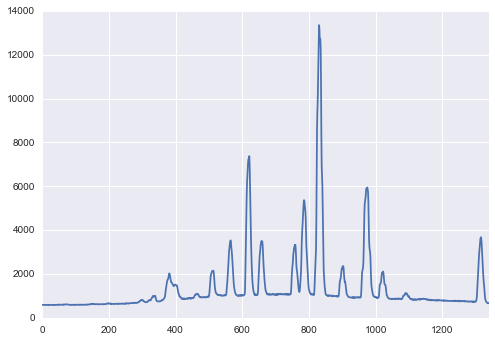

In [6]:
df.iloc[370,:].plot()

Around 500 will be the torch artefacts

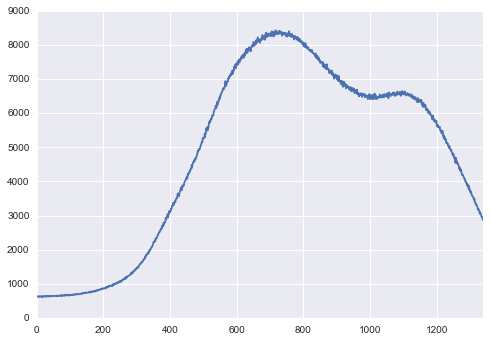

In [7]:
df.iloc[500,:].plot()

Pressure occured at around 200, so let's check that one also

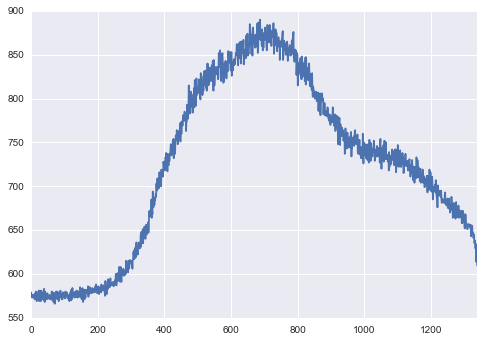

In [8]:
df.iloc[200,:].plot()

270 should be the frowning artifacts

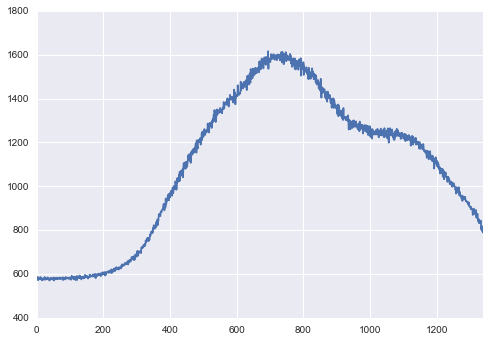

In [9]:
df.iloc[270,:].plot()

Vertical movement would probably occur at around the 130 mark

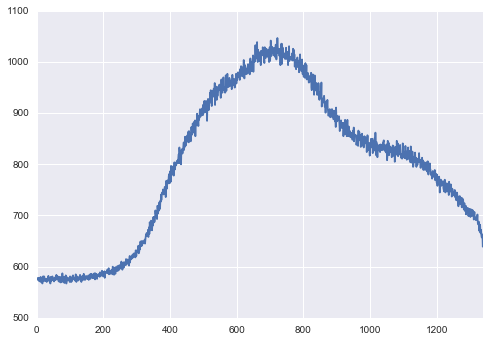

In [10]:
df.iloc[130,:].plot()

Finally, the horizontal movement should occur around 85

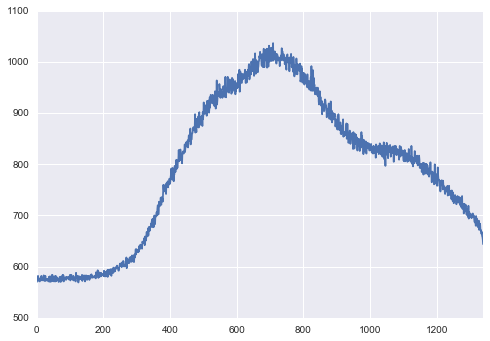

In [11]:
df.iloc[85,:].plot()

Let's directly compare the above graphs and see if we can spot any differences by eye. We'll plot all on the same scale. This should also tell us if it's worth normalising the data to prevent excessive weighting during any distance based ML techniques.

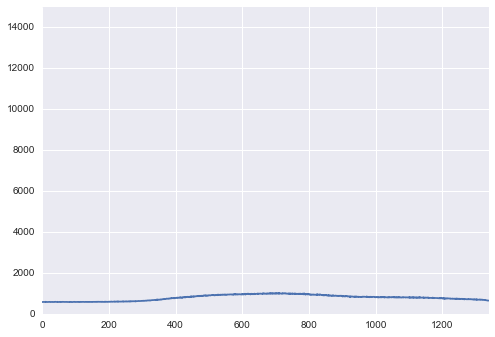

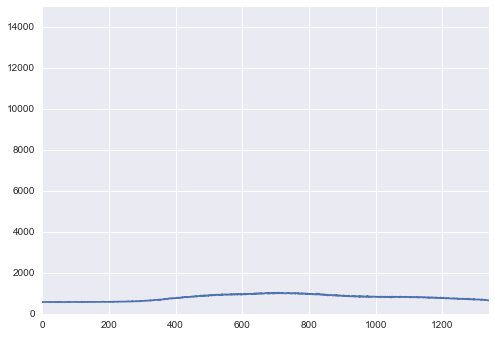

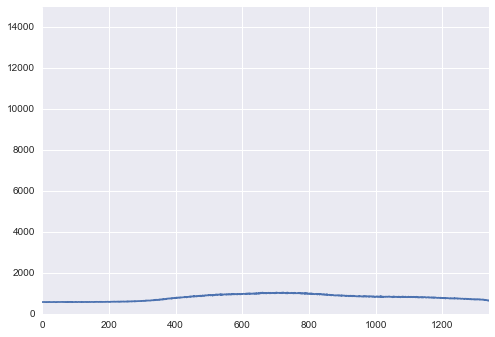

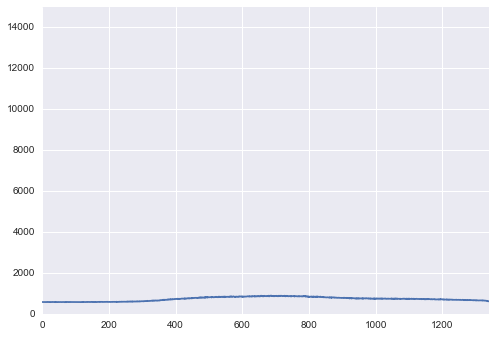

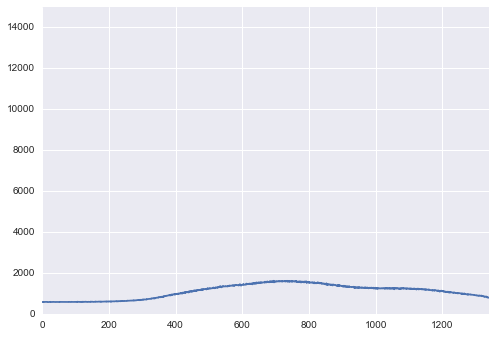

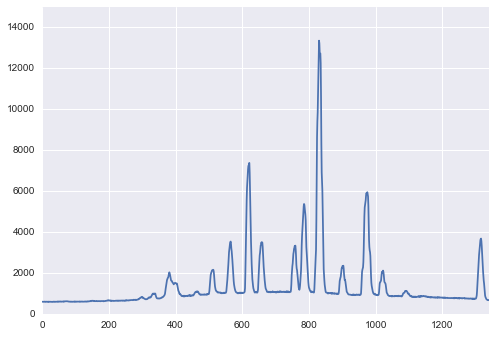

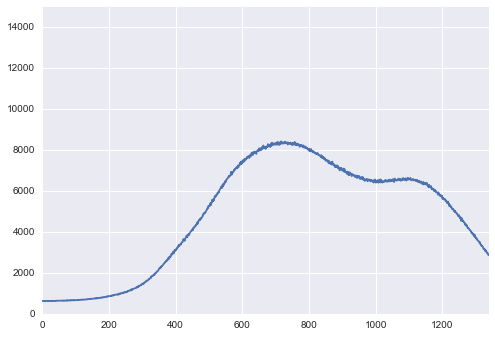

In [12]:
for n in [0,85,130,200, 270, 370, 500]:
    plt.figure()
    df.iloc[n,:].plot(ylim=(0,15000))

## Clustering
We know that there are about 8 clusters in this data - the 6 intentional artefacts, 1 unintentional and the baseline. We also know that they should go 1 -2 -1 -3 -1 -... -1-8-1, where 1 is the baseline and any other number is an artefact (note: the clusters assigned by kMeans probably won't line up with those in the above example. It can't tell the order i nwhich the clusters will occur.).

We can try use a kMeans clustering algorithm and see if it can detect a similar pattern.

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, n_jobs=-2).fit(np.array(df))

/home/buck06191/miniconda3/envs/data/lib/python3.5/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/buck06191/miniconda3/envs/data/lib/python3.5/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/buck06191/miniconda3/envs/data/lib/python3.5/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use '

In [14]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0,
       0, 0,

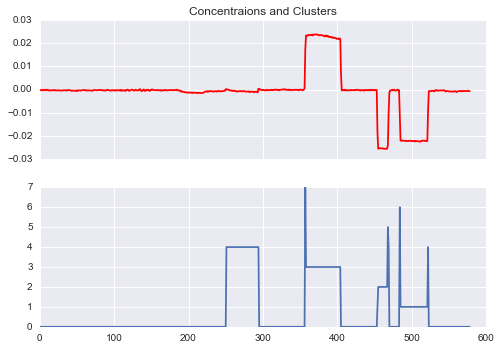

In [15]:
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(df_conc.iloc[:,1],color='r')
axarr[0].set_title('Concentraions and Clusters')
axarr[1].plot(kmeans.labels_)

It seems that without standardising the data it isn't possible to detect at least some of the clusters using k-means clustering. 

We shall try standardising the data.

In [16]:
from sklearn import preprocessing

std_df = preprocessing.StandardScaler().fit_transform(df)

std_kmeans = KMeans(n_clusters=8, n_jobs=-2, ).fit(std_df)

/home/buck06191/miniconda3/envs/data/lib/python3.5/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/buck06191/miniconda3/envs/data/lib/python3.5/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/home/buck06191/miniconda3/envs/data/lib/python3.5/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use '

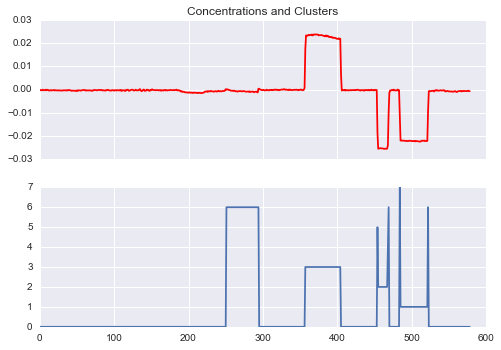

In [20]:
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(df_conc.iloc[:,1],color='r')
axarr[0].set_title('Concentrations and Clusters')
axarr[1].plot(std_kmeans.labels_)

## PCA

Let's look at a PCA of the data

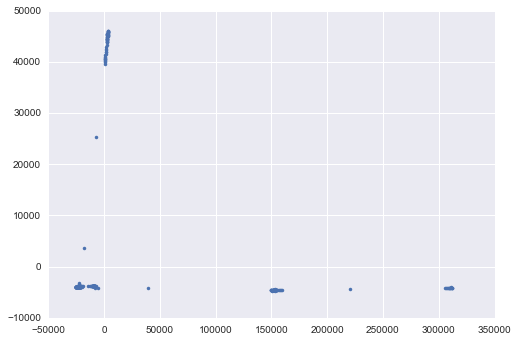

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

df_pca=pca.fit_transform(df)

plt.plot(df_pca[:,0], df_pca[:,1],'.')

Let's try colouring this by our standardised kmeans clusters

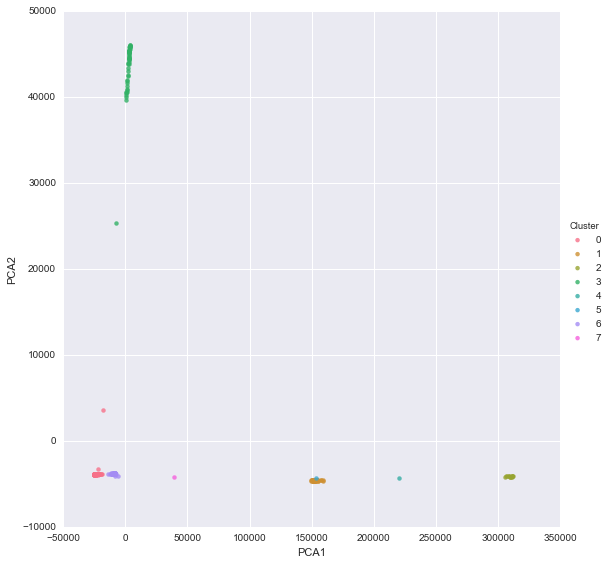

In [24]:
clustered_pca = pd.DataFrame(data={'PCA1':df_pca[:,0],'PCA2':df_pca[:,1],'Cluster':std_kmeans.labels_})
sns.lmplot('PCA1', 'PCA2', data=clustered_pca, hue='Cluster', fit_reg=False, size=8)

In [29]:
for n in [0,85,130,200, 270, 370, 500]:
    print('Data at point %d has \n\tPCA1: %.3f \n\tPCA2: %.3f \n\tCluster: %d'%(n,clustered_pca['PCA1'][n],clustered_pca['PCA2'][n],clustered_pca['Cluster'][n]))

Data at point 0 has 
	PCA1: -22365.684 
	PCA2: -3895.323 
	Cluster: 0
Data at point 85 has 
	PCA1: -21993.970 
	PCA2: -3898.404 
	Cluster: 0
Data at point 130 has 
	PCA1: -21781.436 
	PCA2: -3886.672 
	Cluster: 0
Data at point 200 has 
	PCA1: -25070.158 
	PCA2: -3909.843 
	Cluster: 0
Data at point 270 has 
	PCA1: -8861.007 
	PCA2: -3785.697 
	Cluster: 6
Data at point 370 has 
	PCA1: 3434.481 
	PCA2: 46056.381 
	Cluster: 3
Data at point 500 has 
	PCA1: 152649.028 
	PCA2: -4619.845 
	Cluster: 1


### Let's find out what time points are in each cluster

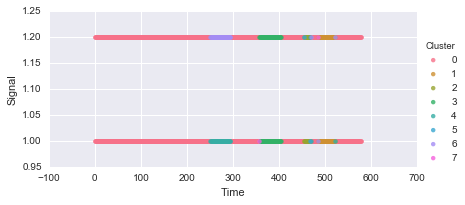

In [55]:
import itertools

n = len(df)
cluster_data=pd.DataFrame(data={'Time': list(itertools.chain(range(n),range(n))),
                                'Signal': list(itertools.chain([1]*n, [1.2]*n)),
                                'Cluster':list(itertools.chain(kmeans.labels_,std_kmeans.labels_))
                               })
fig=sns.lmplot('Time', 'Signal', data=cluster_data, hue='Cluster', 
           fit_reg=False, size=3, aspect=2)